# Semi-Analytic Solutions for Simply-Supported Beams

In [1]:
import matplotlib.pyplot as plt

labels = [r"$v$", r"$\theta$", r"$\kappa$", r"$\gamma$", r"$M$", r"$V$"]
colors = ["b", "b", "g", "g", "r", "r"]

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
    }
)


def plot(x, res):
    fig, axs = plt.subplots(6, 1, figsize=(4, 6), dpi=200, sharex=True)
    for i in range(len(labels)):
        axs[i].plot(x, res[:, i], colors[i])
        axs[i].set_xlabel("$x$")
        axs[i].set_ylabel(labels[i])
    plt.subplots_adjust(hspace=0.1)

    fig.tight_layout()


In [2]:
import numpy as np
from sigmaepsilon.solid.fourier import LoadGroup, PointLoad, LineLoad

L = 1000.0  # geometry
w, h = 20.0, 80.0  # rectangular cross-section
E, nu = 210000.0, 0.25  # material

I = w * h**3 / 12
A = w * h
EI = E * I
G = E / (2 * (1 + nu))
GA = G * A * 5 / 6

loads = LoadGroup(
    concentrated=LoadGroup(
        LC1=PointLoad(x=L / 2, v=[1.0, 0.0]),
        LC5=PointLoad(x=L / 2, v=[0.0, 1.0]),
    ),
    distributed=LoadGroup(
        LC2=LineLoad(x=[0, L], v=[1.0, 0.0]),
        LC6=LineLoad(x=[L / 2, L], v=[0.0, 1.0]),
        LC3=LineLoad(x=[L/2, L], v=['x', 0]),
    ),
)
loads.lock()

x = np.linspace(0, L, 500)


### Timoshenko Beam

In [3]:
from sigmaepsilon.solid.fourier import NavierBeam

beam = NavierBeam(L, 100, EI=EI, GA=GA)
solution = beam.solve(loads, x)


In [4]:
solution["concentrated", "LC1"]

<xarray.DataArray (point: 500, component: 6)>
array([[ 0.00000000e+00,  3.48772142e-07,  0.00000000e+00,
         4.43586803e-09,  0.00000000e+00,  4.96817219e-01],
       [ 7.07831652e-07,  3.48766573e-07, -5.55825235e-12,
         4.44131697e-09, -9.96038822e-01,  4.97427501e-01],
       [ 1.41566140e-06,  3.48749855e-07, -1.11292706e-11,
         4.45557497e-09, -1.99436529e+00,  4.99024397e-01],
       ...,
       [ 1.41566140e-06, -3.48749855e-07, -1.11292706e-11,
        -4.45557497e-09, -1.99436529e+00, -4.99024397e-01],
       [ 7.07831652e-07, -3.48766573e-07, -5.55825235e-12,
        -4.44131697e-09, -9.96038822e-01, -4.97427501e-01],
       [ 1.30640188e-20, -3.48772142e-07,  8.85389511e-26,
        -4.43586803e-09,  1.58661800e-14, -4.96817219e-01]])
Coordinates:
  * point      (point) int32 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
  * component  (component) <U4 'UY' 'ROTZ' 'CZ' 'EXY' 'MZ' 'SY'

In [5]:
solution["concentrated", "LC1"].dims

('point', 'component')

In [6]:
solution["concentrated", "LC1"].coords

Coordinates:
  * point      (point) int32 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
  * component  (component) <U4 'UY' 'ROTZ' 'CZ' 'EXY' 'MZ' 'SY'

In [7]:
type(solution["concentrated", "LC1"].values)

numpy.ndarray

In [8]:
solution["concentrated", "LC1"].attrs

{}

In [9]:
solution["concentrated", "LC1"].attrs["units"] = "meters"

In [10]:
solution["concentrated", "LC1"].coords["component"]

<xarray.DataArray 'component' (component: 6)>
array(['UY', 'ROTZ', 'CZ', 'EXY', 'MZ', 'SY'], dtype='<U4')
Coordinates:
  * component  (component) <U4 'UY' 'ROTZ' 'CZ' 'EXY' 'MZ' 'SY'

In [11]:
solution["concentrated", "LC1"]["component"]

<xarray.DataArray 'component' (component: 6)>
array(['UY', 'ROTZ', 'CZ', 'EXY', 'MZ', 'SY'], dtype='<U4')
Coordinates:
  * component  (component) <U4 'UY' 'ROTZ' 'CZ' 'EXY' 'MZ' 'SY'

In [12]:
solution["concentrated", "LC1"].loc[:, "ROTZ"]

<xarray.DataArray (point: 500)>
array([ 3.48772142e-07,  3.48766573e-07,  3.48749855e-07,  3.48721953e-07,
        3.48682824e-07,  3.48632433e-07,  3.48570767e-07,  3.48497841e-07,
        3.48413688e-07,  3.48318352e-07,  3.48211867e-07,  3.48094245e-07,
        3.47965473e-07,  3.47825516e-07,  3.47674331e-07,  3.47511884e-07,
        3.47338162e-07,  3.47153180e-07,  3.46956971e-07,  3.46749581e-07,
        3.46531042e-07,  3.46301367e-07,  3.46060542e-07,  3.45808531e-07,
        3.45545291e-07,  3.45270787e-07,  3.44985009e-07,  3.44687969e-07,
        3.44379705e-07,  3.44060260e-07,  3.43729667e-07,  3.43387939e-07,
        3.43035061e-07,  3.42670996e-07,  3.42295701e-07,  3.41909142e-07,
        3.41511306e-07,  3.41102210e-07,  3.40681890e-07,  3.40250389e-07,
        3.39807743e-07,  3.39353962e-07,  3.38889031e-07,  3.38412913e-07,
        3.37925564e-07,  3.37426948e-07,  3.36917056e-07,  3.36395902e-07,
        3.35863525e-07,  3.35319969e-07,  3.34765268e-07,  3.34199435e-07,
        3.33622452e-07,  3.33034281e-07,  3.32434878e-07,  3.31824206e-07,
        3.31202256e-07,  3.30569045e-07,  3.29924610e-07,  3.29268998e-07,
        3.28602244e-07,  3.27924358e-07,  3.27235324e-07,  3.26535101e-07,
        3.25823643e-07,  3.25100916e-07,  3.24366908e-07,  3.23621638e-07,
        3.22865146e-07,  3.22097478e-07,  3.21318670e-07,  3.20528732e-07,
        3.19727646e-07,  3.18915372e-07,  3.18091861e-07,  3.17257077e-07,
        3.16411012e-07,  3.15553683e-07,  3.14685132e-07,  3.13805407e-07,
...
       -3.13805407e-07, -3.14685132e-07, -3.15553683e-07, -3.16411012e-07,
       -3.17257077e-07, -3.18091861e-07, -3.18915372e-07, -3.19727646e-07,
       -3.20528732e-07, -3.21318670e-07, -3.22097478e-07, -3.22865146e-07,
       -3.23621638e-07, -3.24366908e-07, -3.25100916e-07, -3.25823643e-07,
       -3.26535101e-07, -3.27235324e-07, -3.27924358e-07, -3.28602244e-07,
       -3.29268998e-07, -3.29924610e-07, -3.30569045e-07, -3.31202256e-07,
       -3.31824206e-07, -3.32434878e-07, -3.33034281e-07, -3.33622452e-07,
       -3.34199435e-07, -3.34765268e-07, -3.35319969e-07, -3.35863525e-07,
       -3.36395902e-07, -3.36917056e-07, -3.37426948e-07, -3.37925564e-07,
       -3.38412913e-07, -3.38889031e-07, -3.39353962e-07, -3.39807743e-07,
       -3.40250389e-07, -3.40681890e-07, -3.41102210e-07, -3.41511306e-07,
       -3.41909142e-07, -3.42295701e-07, -3.42670996e-07, -3.43035061e-07,
       -3.43387939e-07, -3.43729667e-07, -3.44060260e-07, -3.44379705e-07,
       -3.44687969e-07, -3.44985009e-07, -3.45270787e-07, -3.45545291e-07,
       -3.45808531e-07, -3.46060542e-07, -3.46301367e-07, -3.46531042e-07,
       -3.46749581e-07, -3.46956971e-07, -3.47153180e-07, -3.47338162e-07,
       -3.47511884e-07, -3.47674331e-07, -3.47825516e-07, -3.47965473e-07,
       -3.48094245e-07, -3.48211867e-07, -3.48318352e-07, -3.48413688e-07,
       -3.48497841e-07, -3.48570767e-07, -3.48632433e-07, -3.48682824e-07,
       -3.48721953e-07, -3.48749855e-07, -3.48766573e-07, -3.48772142e-07])
Coordinates:
  * point      (point) int32 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
    component  <U4 'ROTZ'
Attributes:
    units:    meters

In [13]:
solution["concentrated", "LC1"].sel(component = "ROTZ")

<xarray.DataArray (point: 500)>
array([ 3.48772142e-07,  3.48766573e-07,  3.48749855e-07,  3.48721953e-07,
        3.48682824e-07,  3.48632433e-07,  3.48570767e-07,  3.48497841e-07,
        3.48413688e-07,  3.48318352e-07,  3.48211867e-07,  3.48094245e-07,
        3.47965473e-07,  3.47825516e-07,  3.47674331e-07,  3.47511884e-07,
        3.47338162e-07,  3.47153180e-07,  3.46956971e-07,  3.46749581e-07,
        3.46531042e-07,  3.46301367e-07,  3.46060542e-07,  3.45808531e-07,
        3.45545291e-07,  3.45270787e-07,  3.44985009e-07,  3.44687969e-07,
        3.44379705e-07,  3.44060260e-07,  3.43729667e-07,  3.43387939e-07,
        3.43035061e-07,  3.42670996e-07,  3.42295701e-07,  3.41909142e-07,
        3.41511306e-07,  3.41102210e-07,  3.40681890e-07,  3.40250389e-07,
        3.39807743e-07,  3.39353962e-07,  3.38889031e-07,  3.38412913e-07,
        3.37925564e-07,  3.37426948e-07,  3.36917056e-07,  3.36395902e-07,
        3.35863525e-07,  3.35319969e-07,  3.34765268e-07,  3.34199435e-07,
        3.33622452e-07,  3.33034281e-07,  3.32434878e-07,  3.31824206e-07,
        3.31202256e-07,  3.30569045e-07,  3.29924610e-07,  3.29268998e-07,
        3.28602244e-07,  3.27924358e-07,  3.27235324e-07,  3.26535101e-07,
        3.25823643e-07,  3.25100916e-07,  3.24366908e-07,  3.23621638e-07,
        3.22865146e-07,  3.22097478e-07,  3.21318670e-07,  3.20528732e-07,
        3.19727646e-07,  3.18915372e-07,  3.18091861e-07,  3.17257077e-07,
        3.16411012e-07,  3.15553683e-07,  3.14685132e-07,  3.13805407e-07,
...
       -3.13805407e-07, -3.14685132e-07, -3.15553683e-07, -3.16411012e-07,
       -3.17257077e-07, -3.18091861e-07, -3.18915372e-07, -3.19727646e-07,
       -3.20528732e-07, -3.21318670e-07, -3.22097478e-07, -3.22865146e-07,
       -3.23621638e-07, -3.24366908e-07, -3.25100916e-07, -3.25823643e-07,
       -3.26535101e-07, -3.27235324e-07, -3.27924358e-07, -3.28602244e-07,
       -3.29268998e-07, -3.29924610e-07, -3.30569045e-07, -3.31202256e-07,
       -3.31824206e-07, -3.32434878e-07, -3.33034281e-07, -3.33622452e-07,
       -3.34199435e-07, -3.34765268e-07, -3.35319969e-07, -3.35863525e-07,
       -3.36395902e-07, -3.36917056e-07, -3.37426948e-07, -3.37925564e-07,
       -3.38412913e-07, -3.38889031e-07, -3.39353962e-07, -3.39807743e-07,
       -3.40250389e-07, -3.40681890e-07, -3.41102210e-07, -3.41511306e-07,
       -3.41909142e-07, -3.42295701e-07, -3.42670996e-07, -3.43035061e-07,
       -3.43387939e-07, -3.43729667e-07, -3.44060260e-07, -3.44379705e-07,
       -3.44687969e-07, -3.44985009e-07, -3.45270787e-07, -3.45545291e-07,
       -3.45808531e-07, -3.46060542e-07, -3.46301367e-07, -3.46531042e-07,
       -3.46749581e-07, -3.46956971e-07, -3.47153180e-07, -3.47338162e-07,
       -3.47511884e-07, -3.47674331e-07, -3.47825516e-07, -3.47965473e-07,
       -3.48094245e-07, -3.48211867e-07, -3.48318352e-07, -3.48413688e-07,
       -3.48497841e-07, -3.48570767e-07, -3.48632433e-07, -3.48682824e-07,
       -3.48721953e-07, -3.48749855e-07, -3.48766573e-07, -3.48772142e-07])
Coordinates:
  * point      (point) int32 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
    component  <U4 'ROTZ'
Attributes:
    units:    meters

In [14]:
solution["concentrated", "LC1"].loc[dict(component="ROTZ")]

<xarray.DataArray (point: 500)>
array([ 3.48772142e-07,  3.48766573e-07,  3.48749855e-07,  3.48721953e-07,
        3.48682824e-07,  3.48632433e-07,  3.48570767e-07,  3.48497841e-07,
        3.48413688e-07,  3.48318352e-07,  3.48211867e-07,  3.48094245e-07,
        3.47965473e-07,  3.47825516e-07,  3.47674331e-07,  3.47511884e-07,
        3.47338162e-07,  3.47153180e-07,  3.46956971e-07,  3.46749581e-07,
        3.46531042e-07,  3.46301367e-07,  3.46060542e-07,  3.45808531e-07,
        3.45545291e-07,  3.45270787e-07,  3.44985009e-07,  3.44687969e-07,
        3.44379705e-07,  3.44060260e-07,  3.43729667e-07,  3.43387939e-07,
        3.43035061e-07,  3.42670996e-07,  3.42295701e-07,  3.41909142e-07,
        3.41511306e-07,  3.41102210e-07,  3.40681890e-07,  3.40250389e-07,
        3.39807743e-07,  3.39353962e-07,  3.38889031e-07,  3.38412913e-07,
        3.37925564e-07,  3.37426948e-07,  3.36917056e-07,  3.36395902e-07,
        3.35863525e-07,  3.35319969e-07,  3.34765268e-07,  3.34199435e-07,
        3.33622452e-07,  3.33034281e-07,  3.32434878e-07,  3.31824206e-07,
        3.31202256e-07,  3.30569045e-07,  3.29924610e-07,  3.29268998e-07,
        3.28602244e-07,  3.27924358e-07,  3.27235324e-07,  3.26535101e-07,
        3.25823643e-07,  3.25100916e-07,  3.24366908e-07,  3.23621638e-07,
        3.22865146e-07,  3.22097478e-07,  3.21318670e-07,  3.20528732e-07,
        3.19727646e-07,  3.18915372e-07,  3.18091861e-07,  3.17257077e-07,
        3.16411012e-07,  3.15553683e-07,  3.14685132e-07,  3.13805407e-07,
...
       -3.13805407e-07, -3.14685132e-07, -3.15553683e-07, -3.16411012e-07,
       -3.17257077e-07, -3.18091861e-07, -3.18915372e-07, -3.19727646e-07,
       -3.20528732e-07, -3.21318670e-07, -3.22097478e-07, -3.22865146e-07,
       -3.23621638e-07, -3.24366908e-07, -3.25100916e-07, -3.25823643e-07,
       -3.26535101e-07, -3.27235324e-07, -3.27924358e-07, -3.28602244e-07,
       -3.29268998e-07, -3.29924610e-07, -3.30569045e-07, -3.31202256e-07,
       -3.31824206e-07, -3.32434878e-07, -3.33034281e-07, -3.33622452e-07,
       -3.34199435e-07, -3.34765268e-07, -3.35319969e-07, -3.35863525e-07,
       -3.36395902e-07, -3.36917056e-07, -3.37426948e-07, -3.37925564e-07,
       -3.38412913e-07, -3.38889031e-07, -3.39353962e-07, -3.39807743e-07,
       -3.40250389e-07, -3.40681890e-07, -3.41102210e-07, -3.41511306e-07,
       -3.41909142e-07, -3.42295701e-07, -3.42670996e-07, -3.43035061e-07,
       -3.43387939e-07, -3.43729667e-07, -3.44060260e-07, -3.44379705e-07,
       -3.44687969e-07, -3.44985009e-07, -3.45270787e-07, -3.45545291e-07,
       -3.45808531e-07, -3.46060542e-07, -3.46301367e-07, -3.46531042e-07,
       -3.46749581e-07, -3.46956971e-07, -3.47153180e-07, -3.47338162e-07,
       -3.47511884e-07, -3.47674331e-07, -3.47825516e-07, -3.47965473e-07,
       -3.48094245e-07, -3.48211867e-07, -3.48318352e-07, -3.48413688e-07,
       -3.48497841e-07, -3.48570767e-07, -3.48632433e-07, -3.48682824e-07,
       -3.48721953e-07, -3.48749855e-07, -3.48766573e-07, -3.48772142e-07])
Coordinates:
  * point      (point) int32 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
    component  <U4 'ROTZ'
Attributes:
    units:    meters

In [15]:
solution["concentrated", "LC1"].isel(component = 1)

<xarray.DataArray (point: 500)>
array([ 3.48772142e-07,  3.48766573e-07,  3.48749855e-07,  3.48721953e-07,
        3.48682824e-07,  3.48632433e-07,  3.48570767e-07,  3.48497841e-07,
        3.48413688e-07,  3.48318352e-07,  3.48211867e-07,  3.48094245e-07,
        3.47965473e-07,  3.47825516e-07,  3.47674331e-07,  3.47511884e-07,
        3.47338162e-07,  3.47153180e-07,  3.46956971e-07,  3.46749581e-07,
        3.46531042e-07,  3.46301367e-07,  3.46060542e-07,  3.45808531e-07,
        3.45545291e-07,  3.45270787e-07,  3.44985009e-07,  3.44687969e-07,
        3.44379705e-07,  3.44060260e-07,  3.43729667e-07,  3.43387939e-07,
        3.43035061e-07,  3.42670996e-07,  3.42295701e-07,  3.41909142e-07,
        3.41511306e-07,  3.41102210e-07,  3.40681890e-07,  3.40250389e-07,
        3.39807743e-07,  3.39353962e-07,  3.38889031e-07,  3.38412913e-07,
        3.37925564e-07,  3.37426948e-07,  3.36917056e-07,  3.36395902e-07,
        3.35863525e-07,  3.35319969e-07,  3.34765268e-07,  3.34199435e-07,
        3.33622452e-07,  3.33034281e-07,  3.32434878e-07,  3.31824206e-07,
        3.31202256e-07,  3.30569045e-07,  3.29924610e-07,  3.29268998e-07,
        3.28602244e-07,  3.27924358e-07,  3.27235324e-07,  3.26535101e-07,
        3.25823643e-07,  3.25100916e-07,  3.24366908e-07,  3.23621638e-07,
        3.22865146e-07,  3.22097478e-07,  3.21318670e-07,  3.20528732e-07,
        3.19727646e-07,  3.18915372e-07,  3.18091861e-07,  3.17257077e-07,
        3.16411012e-07,  3.15553683e-07,  3.14685132e-07,  3.13805407e-07,
...
       -3.13805407e-07, -3.14685132e-07, -3.15553683e-07, -3.16411012e-07,
       -3.17257077e-07, -3.18091861e-07, -3.18915372e-07, -3.19727646e-07,
       -3.20528732e-07, -3.21318670e-07, -3.22097478e-07, -3.22865146e-07,
       -3.23621638e-07, -3.24366908e-07, -3.25100916e-07, -3.25823643e-07,
       -3.26535101e-07, -3.27235324e-07, -3.27924358e-07, -3.28602244e-07,
       -3.29268998e-07, -3.29924610e-07, -3.30569045e-07, -3.31202256e-07,
       -3.31824206e-07, -3.32434878e-07, -3.33034281e-07, -3.33622452e-07,
       -3.34199435e-07, -3.34765268e-07, -3.35319969e-07, -3.35863525e-07,
       -3.36395902e-07, -3.36917056e-07, -3.37426948e-07, -3.37925564e-07,
       -3.38412913e-07, -3.38889031e-07, -3.39353962e-07, -3.39807743e-07,
       -3.40250389e-07, -3.40681890e-07, -3.41102210e-07, -3.41511306e-07,
       -3.41909142e-07, -3.42295701e-07, -3.42670996e-07, -3.43035061e-07,
       -3.43387939e-07, -3.43729667e-07, -3.44060260e-07, -3.44379705e-07,
       -3.44687969e-07, -3.44985009e-07, -3.45270787e-07, -3.45545291e-07,
       -3.45808531e-07, -3.46060542e-07, -3.46301367e-07, -3.46531042e-07,
       -3.46749581e-07, -3.46956971e-07, -3.47153180e-07, -3.47338162e-07,
       -3.47511884e-07, -3.47674331e-07, -3.47825516e-07, -3.47965473e-07,
       -3.48094245e-07, -3.48211867e-07, -3.48318352e-07, -3.48413688e-07,
       -3.48497841e-07, -3.48570767e-07, -3.48632433e-07, -3.48682824e-07,
       -3.48721953e-07, -3.48749855e-07, -3.48766573e-07, -3.48772142e-07])
Coordinates:
  * point      (point) int32 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
    component  <U4 'ROTZ'
Attributes:
    units:    meters

In [23]:
solution["concentrated", "LC1"].loc[:, "ROTZ"].shape

(500,)

In [16]:
solution["concentrated", "LC1"].shape, x.shape


((500, 6), (500,))

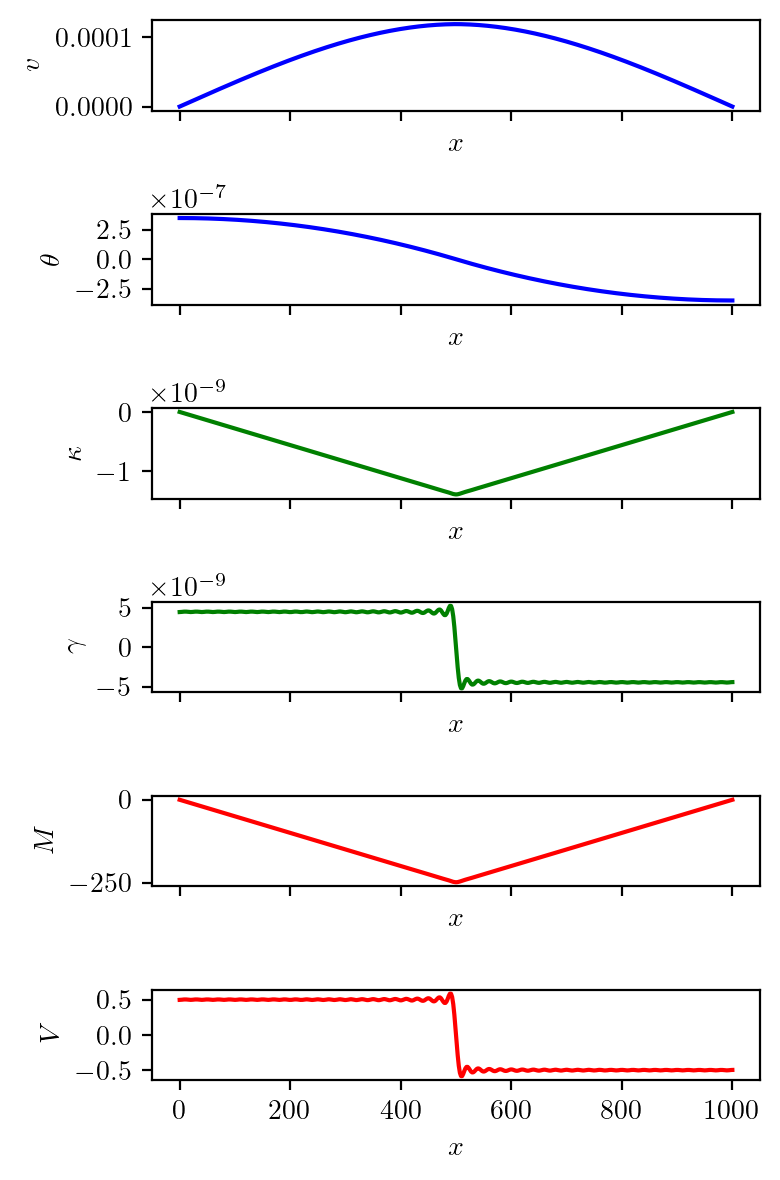

In [17]:
plot(x, solution["concentrated", "LC1"].values)


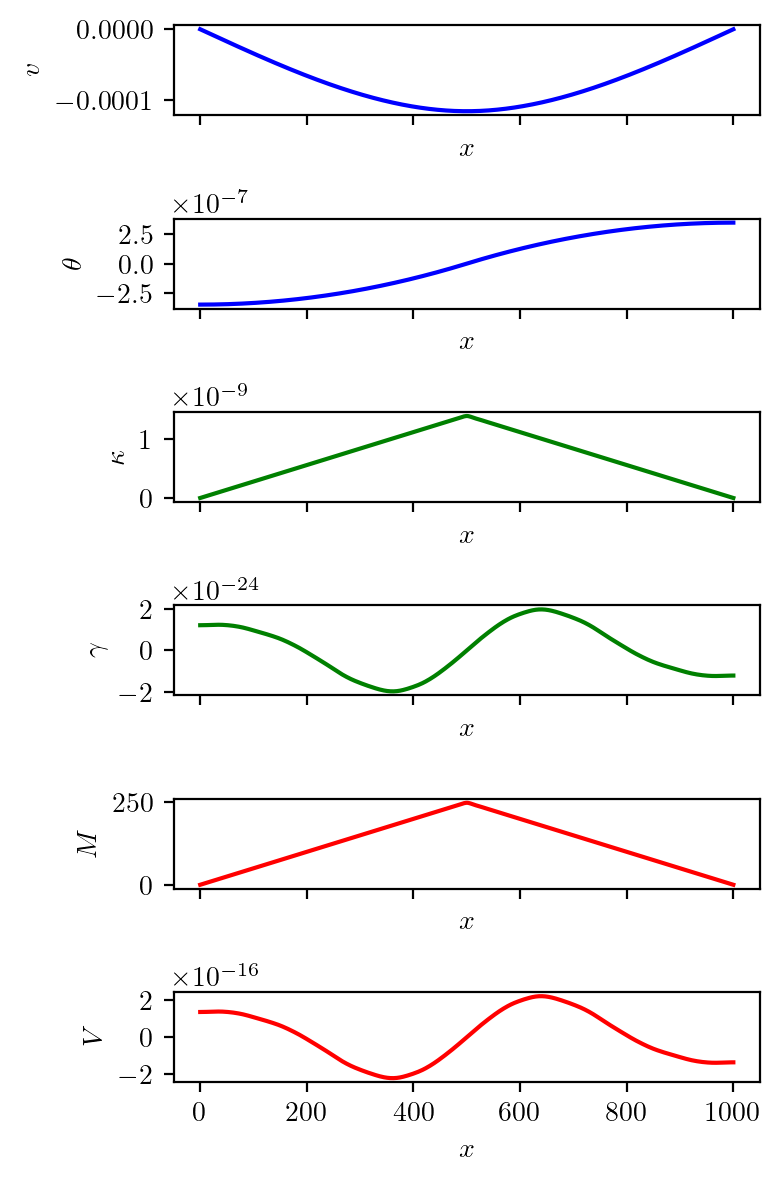

In [18]:
plot(x, solution["distributed", "LC6"].values)


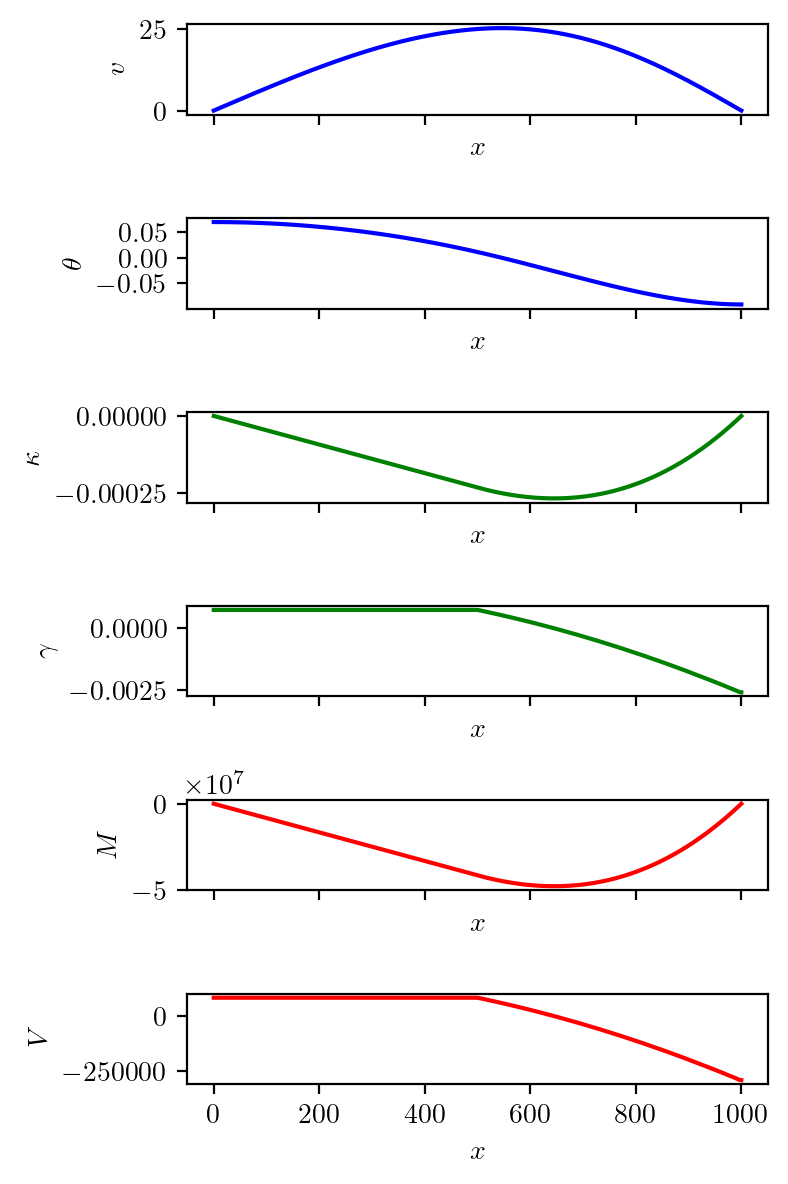

In [19]:
plot(x, solution["distributed", "LC3"].values)


### Euler-Bernoulli Beam

In [20]:
beam = NavierBeam(L, 100, EI=EI)
solution = beam.solve(loads, x)


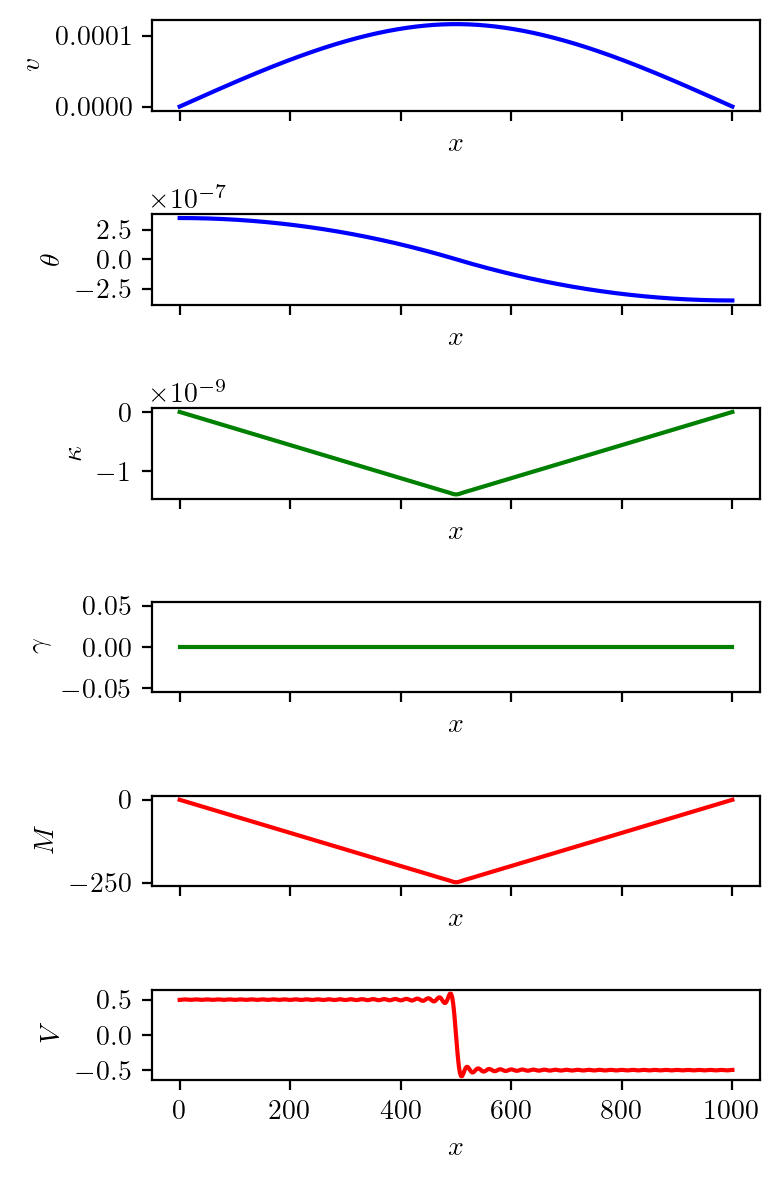

In [21]:
plot(x, solution["concentrated", "LC1"].values)


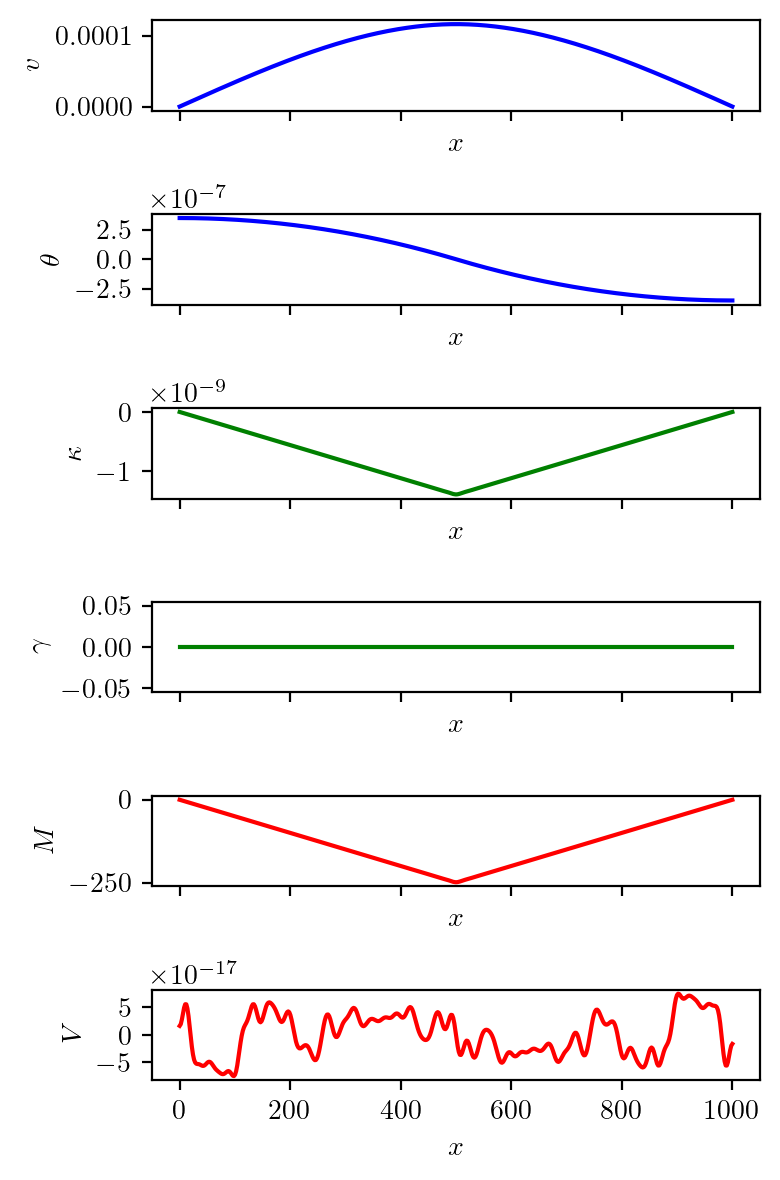

In [22]:
plot(x, solution["distributed", "LC6"].values)
